In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('./Data_reg/qualite-vin-rouge.csv')
print(df) 
df.info()

      acidité fixe  acidité volatile  acide citrique  sucre résiduel  \
0              7.4             0.700            0.00             1.9   
1              7.8             0.880            0.00             2.6   
2              7.8             0.760            0.04             2.3   
3             11.2             0.280            0.56             1.9   
4              7.4             0.700            0.00             1.9   
...            ...               ...             ...             ...   
1594           6.2             0.600            0.08             2.0   
1595           5.9             0.550            0.10             2.2   
1596           6.3             0.510            0.13             2.3   
1597           5.9             0.645            0.12             2.0   
1598           6.0             0.310            0.47             3.6   

      chlorures  dioxyde de soufre libre  anhydride sulfureux total  densité  \
0         0.076                     11.0               

In [3]:
df.describe()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Déterminer les corrélations les plus fortes
df.corrwith(df['qualité'], method = 'pearson').sort_values(ascending = False)

qualité                      1.000000
alcool                       0.476166
sulphates                    0.251397
acide citrique               0.226373
acidité fixe                 0.124052
sucre résiduel               0.013732
dioxyde de soufre libre     -0.050656
pH                          -0.057731
chlorures                   -0.128907
densité                     -0.174919
anhydride sulfureux total   -0.185100
acidité volatile            -0.390558
dtype: float64

In [5]:
x=df[['alcool']]
y=np.array(df[['qualité']])
y.shape

(1599, 1)

In [6]:
#matrice X
X=np.hstack((x**2,x,np.ones(x.shape)))
X.shape

(1599, 3)

# Theta

In [7]:
#initialisation de theta
theta=np.random.randn(3,1)
theta

array([[-0.75885089],
       [ 0.21405793],
       [ 0.30265902]])

## Modèle


In [8]:
def model(x,theta):
    return X.dot(theta)

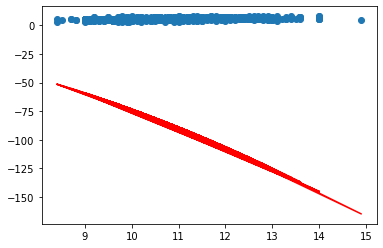

In [9]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), color='r')

## Fonction coût

In [10]:
#Fonction Cout 

def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
cost_fonction(X,y,theta)

3891.1093316534248

# Gradient et descente de gradient


In [12]:
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

 ## Theta Final 
 

In [14]:

n_iterations= 300
learning_rate =0.00001
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)



In [15]:
theta_final

array([[0.02043089],
       [0.28778999],
       [0.30970857]])

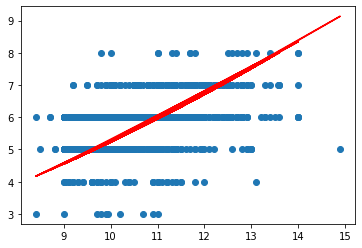

In [16]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

# Courbe d'apprentissage 

La regression ne fonctionne pas car les données sont qualitatives et non quantitatives , il serait pertinent de faire une classification ou une regression logistique.

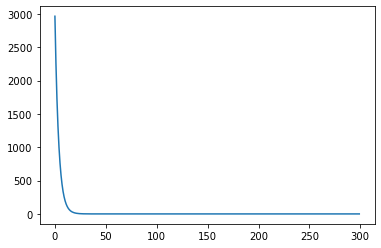

In [20]:
plt.plot(range(n_iterations),cost_history)

In [17]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 
    

In [18]:
coef_determination(y,predictions)

-0.02810745146807081